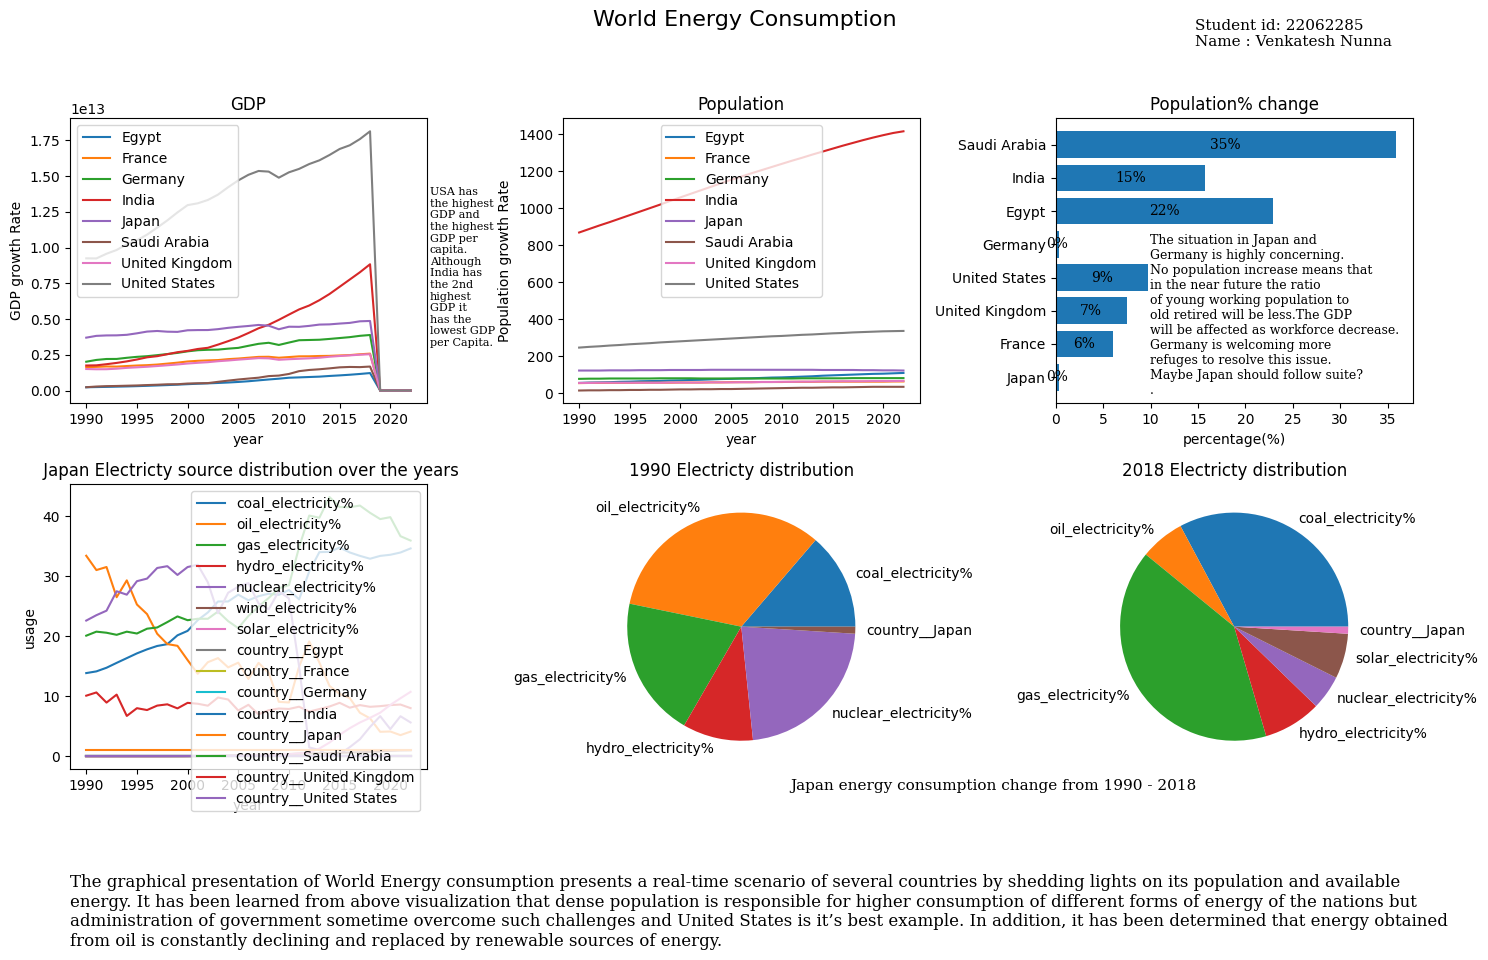

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#import DataFrame
DF = pd.read_csv('World Energy Consumption.csv')
#Filter on needed columns
DF=DF[['country','year','coal_production','electricity_generation','biofuel_electricity','coal_electricity','fossil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','oil_electricity','renewables_electricity','oil_production','population','gdp','solar_electricity','wind_electricity','energy_per_gdp','energy_per_capita','fossil_share_elec','gas_share_elec','gas_production','low_carbon_share_elec']]
#Filter on year >=1985
DF=DF[DF['year']>=1990]
#Filter on countries
Countries=['Egypt','Saudi Arabia','United Kingdom','France','Germany','United States','Japan','India']
#filter columns
DF=DF.loc[DF['country'].isin(Countries)]
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15,12))
DF_gdp=DF.groupby(['year','country'])['gdp'].sum().unstack('country')
DF_pop=DF.groupby(['year','country'])['population'].sum().unstack('country')
DF_pop_mil=round(DF_pop/1000000)
# Plot 1
axs[0, 0].plot(DF_gdp,label=DF_gdp.columns)
axs[0, 0].set_title('GDP')
axs[0, 0].set_xlabel('year')
axs[0, 0].set_ylabel('GDP growth Rate')
axs[0, 0].legend()

# Plot 2
axs[0, 1].plot(DF_pop_mil,label=DF_pop_mil.columns)
axs[0, 1].set_title('Population')
axs[0, 1].set_xlabel('year')
axs[0, 1].set_ylabel('Population growth Rate')
axs[0, 1].legend()

DF_comparision =pd.DataFrame()
DF_comparision =pd.DataFrame()
DF_comparision['DF_2000_2005_gdp']=DF[(DF['year']>=2000) & (DF['year']<=2005)].groupby('country')['gdp'].mean()
DF_comparision['DF_2010_2015_gdp']=DF[(DF['year']>=2010) & (DF['year']<=2015)].groupby('country')['gdp'].mean()
DF_comparision['gdp_diffrence%']=100*(DF_comparision['DF_2010_2015_gdp']-DF_comparision['DF_2000_2005_gdp'])/DF_comparision['DF_2000_2005_gdp']
DF_comparision.sort_values('gdp_diffrence%',ascending=True,inplace=True)
DF_comparision['DF_2000_2005_pop']=DF[(DF['year']>=2000) & (DF['year']<=2005)].groupby('country')['population'].mean()
DF_comparision['DF_2010_2015_pop']=DF[(DF['year']>=2010) & (DF['year']<=2015)].groupby('country')['population'].mean()
DF_comparision['pop_diffrence%']=100*(DF_comparision['DF_2010_2015_pop']-DF_comparision['DF_2000_2005_pop'])/DF_comparision['DF_2000_2005_pop']
DF_comparision.sort_values('gdp_diffrence%',ascending=True,inplace=True)
DF_comparision.head()

# Plot 3
axs[0, 2].barh(DF_comparision.index,DF_comparision['pop_diffrence%'])
for i in DF_comparision.index:
    axs[0, 2].annotate(f"{int(DF_comparision['pop_diffrence%'][i])}%",
                   xy=(DF_comparision['pop_diffrence%'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='black')
axs[0, 2].set_title('Population% change')
axs[0,2].set_xlabel('percentage(%)')
fig.text(0.77, 0.66,
'''The situation in Japan and
Germany is highly concerning.
No population increase means that
in the near future the ratio
of young working population to
old retired will be less.The GDP
will be affected as workforce decrease.
Germany is welcoming more
refuges to resolve this issue.
Maybe Japan should follow suite?
.'''
, fontsize=9, fontweight='light', fontfamily='serif')


# Plot 4
Parse=['coal_electricity','oil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','wind_electricity','solar_electricity']
DF['total']=DF[Parse].sum(axis=1)
DF_Electricity=DF[['year','country']]
for i in Parse:
    DF_Electricity[f"{i}%"]=round(100*(DF[i]/DF['total']),4)
# plot the change in the percentage over the years
# chart_DF=DF_Electricity[DF_Electricity['country']=='Japan'].groupby('year').mean()
# print(chart_DF.columns)
df_dummies = pd.get_dummies(DF_Electricity['country'], prefix='country_')  # Create dummies with a prefix
DF_Electricity = pd.concat([DF_Electricity, df_dummies], axis=1)  # Concatenate along columns
non_numeric_cols = DF_Electricity.select_dtypes(include=['object']).columns

chart_DF = DF_Electricity[DF_Electricity['country'] == 'Japan'].drop(non_numeric_cols, axis=1).groupby('year').mean()

axs[1,0].plot(chart_DF,label=chart_DF.columns)
axs[1,0].set_title(" Japan Electricty source distribution over the years")
axs[1,0].set_xlabel('year')
axs[1,0].set_ylabel('usage')
axs[1,0].legend()


# Plot 5 and plot 6

years=[1990,2018]
count=1
for y in years:
    chart_DF_pie_1=chart_DF[(chart_DF.index.values==y)]
    for i in chart_DF_pie_1.columns:
        if chart_DF_pie_1.iloc[0][i]<1:
            chart_DF_pie_1.drop(columns=[i],axis=1,inplace=True)
    axs[1, count].pie(chart_DF_pie_1.iloc[0].values,labels=chart_DF_pie_1.columns)
    axs[1, count].set_title(f"{int(y)} Electricty distribution")
    count=count+1
fig.delaxes(axs[2, 0])
fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 2])
fig.text(0.29, 0.7,
'''USA has
the highest
GDP and
the highest
GDP per
capita.
Although
India has
the 2nd
highest
GDP it
has the
lowest GDP
per Capita.'''
, fontsize=8, fontweight='light', fontfamily='serif')

# # Add a main title to the entire set of subplots
plt.suptitle('World Energy Consumption', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the position of the main title
fig.text(0.53, 0.33,
'''Japan energy consumption change from 1990 - 2018 '''
, fontsize=11, fontweight='light', fontfamily='serif')

fig.text(0.8, 0.95,
'''Student id: 22062285
Name : Venkatesh Nunna'''
, fontsize=11, fontweight='light', fontfamily='serif')

fig.text(0.05, 0.2,
'''The graphical presentation of World Energy consumption presents a real-time scenario of several countries by shedding lights on its population and available
energy. It has been learned from above visualization that dense population is responsible for higher consumption of different forms of energy of the nations but
administration of government sometime overcome such challenges and United States is it’s best example. In addition, it has been determined that energy obtained
from oil is constantly declining and replaced by renewable sources of energy.'''
, fontsize=12, fontweight='light', fontfamily='serif')

# plt.savefig('22062285.png')
# Show the plots
plt.show()
